In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from ultralytics import YOLO
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Upload the new Roboflow export (with 400 labeled images)
uploaded = files.upload()

Saving Helmet Detection.v3i.yolov8.zip to Helmet Detection.v3i.yolov8.zip


In [4]:
!unzip "Helmet Detection.v3i.yolov8.zip" -d helmet_dataset_v2

Archive:  Helmet Detection.v3i.yolov8.zip
  inflating: helmet_dataset_v2/README.dataset.txt  
  inflating: helmet_dataset_v2/README.roboflow.txt  
  inflating: helmet_dataset_v2/data.yaml  
   creating: helmet_dataset_v2/test/
   creating: helmet_dataset_v2/test/images/
 extracting: helmet_dataset_v2/test/images/101_jpg.rf.d4cb4dc2fe939431d1c5de1f60be7019.jpg  
 extracting: helmet_dataset_v2/test/images/111_jpg.rf.acddc5e7e26f2d761bf621e62f1511ad.jpg  
 extracting: helmet_dataset_v2/test/images/11_jpg.rf.9c866c2b4a586b90ded99dc27bacef0a.jpg  
 extracting: helmet_dataset_v2/test/images/130_jpeg.rf.7a15fc90fc1954bb87732c2086fd0888.jpg  
 extracting: helmet_dataset_v2/test/images/138_jpg.rf.0350b8a63321595495524f0b4e35cfa7.jpg  
 extracting: helmet_dataset_v2/test/images/153_jpg.rf.1cd89313b211ef74529915e3b06d3b96.jpg  
 extracting: helmet_dataset_v2/test/images/158_jpg.rf.9451df51ea30dd2ad5ed973146acb095.jpg  
 extracting: helmet_dataset_v2/test/images/164_jpg.rf.3c76a583391dcce215d07bb2

In [5]:
!ls helmet_dataset_v2

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
model = YOLO('yolov8n.pt')  # or yolov8s.pt for better accuracy

model.train(
    data='helmet_dataset_v2/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    project='helmet_detect_v2',
    name='helmet_2class'
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=helmet_dataset_v2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_2class, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751702  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2486.9±499.1 MB/s, size: 1047.6 KB)


train: Scanning /content/helmet_dataset_v2/train/labels... 280 images, 5 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<00:00, 1162.79it/s]

train: New cache created: /content/helmet_dataset_v2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1668.8±834.8 MB/s, size: 372.6 KB)


val: Scanning /content/helmet_dataset_v2/valid/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1743.70it/s]

val: New cache created: /content/helmet_dataset_v2/valid/labels.cache


Plotting labels to helmet_detect_v2/helmet_2class/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to helmet_detect_v2/helmet_2class
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.9293      3.307      1.121         17        640: 100%|██████████| 18/18 [04:19<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.54s/it]

                   all         80         95    0.00389      0.977      0.322      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.8146      1.958      1.003         14        640: 100%|██████████| 18/18 [04:03<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.63s/it]

                   all         80         95          1      0.041      0.428      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.8622      1.757      1.021         20        640: 100%|██████████| 18/18 [04:07<00:00, 13.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.36s/it]

                   all         80         95      0.879      0.314      0.658      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.9028      1.637       1.05         20        640: 100%|██████████| 18/18 [04:03<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.41s/it]

                   all         80         95      0.786      0.469      0.721      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      0.842      1.472      1.013         14        640: 100%|██████████| 18/18 [04:07<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.34s/it]

                   all         80         95       0.61      0.683      0.716      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.9225      1.531      1.077         15        640: 100%|██████████| 18/18 [04:03<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.33s/it]

                   all         80         95      0.918      0.373      0.565      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8994      1.457      1.057         12        640: 100%|██████████| 18/18 [04:02<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.08s/it]

                   all         80         95      0.678       0.68       0.74      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.8827      1.314      1.037         16        640: 100%|██████████| 18/18 [04:05<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.02s/it]

                   all         80         95      0.718      0.717       0.81      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8441      1.264       1.02         13        640: 100%|██████████| 18/18 [04:01<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.83s/it]

                   all         80         95      0.746      0.618      0.811      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8558      1.227      1.031         22        640: 100%|██████████| 18/18 [04:01<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.89s/it]

                   all         80         95      0.817      0.652        0.8      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      0.824      1.137      1.018         27        640: 100%|██████████| 18/18 [04:02<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.91s/it]

                   all         80         95      0.877      0.692      0.846      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7724      1.062      1.002         14        640: 100%|██████████| 18/18 [04:00<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.18s/it]

                   all         80         95      0.803      0.779      0.848      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.8097      1.025     0.9983         16        640: 100%|██████████| 18/18 [03:57<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.83s/it]

                   all         80         95      0.898       0.75      0.844      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.7473      1.004     0.9758         18        640: 100%|██████████| 18/18 [03:59<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.90s/it]

                   all         80         95      0.921       0.76      0.862      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.7484     0.9522     0.9886         13        640: 100%|██████████| 18/18 [03:58<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.19s/it]

                   all         80         95      0.915      0.804      0.859      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7604     0.9046     0.9695         16        640: 100%|██████████| 18/18 [03:58<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.92s/it]

                   all         80         95      0.904      0.812      0.882      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7527     0.9212     0.9822         17        640: 100%|██████████| 18/18 [03:58<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.83s/it]

                   all         80         95      0.886      0.798      0.894        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.7543     0.8826     0.9786         15        640: 100%|██████████| 18/18 [04:04<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.24s/it]

                   all         80         95      0.902      0.854      0.894      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6955     0.8064     0.9583         28        640: 100%|██████████| 18/18 [03:58<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.89s/it]

                   all         80         95       0.92      0.855      0.922      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.688     0.8007     0.9711         17        640: 100%|██████████| 18/18 [03:56<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.47s/it]

                   all         80         95      0.908      0.919      0.934      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.6842     0.7261     0.9375         15        640: 100%|██████████| 18/18 [03:54<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.90s/it]

                   all         80         95      0.899      0.907      0.931       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      0.697     0.7455     0.9294         16        640: 100%|██████████| 18/18 [03:56<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.23s/it]

                   all         80         95      0.938      0.897      0.929      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.6807     0.7285     0.9614         13        640: 100%|██████████| 18/18 [03:57<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.92s/it]

                   all         80         95      0.963      0.828      0.931      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6975     0.7405     0.9684         19        640: 100%|██████████| 18/18 [03:57<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.01s/it]

                   all         80         95      0.915      0.876       0.93      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.6753     0.6957     0.9533         14        640: 100%|██████████| 18/18 [03:57<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

                   all         80         95      0.912      0.855      0.915      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.6139     0.6651     0.9445         12        640: 100%|██████████| 18/18 [03:58<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.11s/it]

                   all         80         95      0.933      0.871      0.955      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.6283     0.6352     0.9399         20        640: 100%|██████████| 18/18 [03:56<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]

                   all         80         95      0.915      0.881      0.964      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6349     0.6347     0.9417         17        640: 100%|██████████| 18/18 [03:57<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.07s/it]

                   all         80         95      0.949       0.85      0.921      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.6228     0.6239     0.9217         28        640: 100%|██████████| 18/18 [03:59<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.05s/it]

                   all         80         95      0.955      0.866      0.952      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5803      0.617     0.9222         18        640: 100%|██████████| 18/18 [03:55<00:00, 13.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.82s/it]

                   all         80         95      0.977      0.902      0.965      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.6006     0.6093     0.9357         23        640: 100%|██████████| 18/18 [03:57<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.78s/it]

                   all         80         95      0.962      0.805      0.953      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6113     0.5746     0.9341         22        640: 100%|██████████| 18/18 [04:01<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.32s/it]

                   all         80         95       0.92      0.808      0.938      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.5524     0.5682     0.9059         13        640: 100%|██████████| 18/18 [03:57<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.88s/it]

                   all         80         95      0.917      0.924      0.954      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.5695     0.5499     0.9011         15        640: 100%|██████████| 18/18 [04:01<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.65s/it]

                   all         80         95      0.971      0.841      0.937       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5652     0.5379     0.9072         18        640: 100%|██████████| 18/18 [03:59<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.86s/it]

                   all         80         95      0.918      0.917      0.949       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5458     0.5318     0.9226          9        640: 100%|██████████| 18/18 [03:58<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.09s/it]

                   all         80         95      0.946      0.904      0.956      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5338     0.5214      0.911         20        640: 100%|██████████| 18/18 [03:58<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.11s/it]

                   all         80         95      0.949      0.907      0.942      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5237     0.4954     0.8845         12        640: 100%|██████████| 18/18 [03:58<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.92s/it]

                   all         80         95      0.946      0.889      0.942      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5433     0.5008     0.9064         19        640: 100%|██████████| 18/18 [03:58<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.93s/it]

                   all         80         95       0.96      0.924      0.959      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5087     0.4683     0.8882         17        640: 100%|██████████| 18/18 [03:57<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.11s/it]

                   all         80         95      0.964      0.924      0.957      0.816


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.4571     0.4599     0.8514          9        640: 100%|██████████| 18/18 [03:58<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<00:00,  7.29s/it]

                   all         80         95      0.953      0.925      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4527     0.4591     0.8676          8        640: 100%|██████████| 18/18 [03:58<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.98s/it]

                   all         80         95      0.952      0.914      0.956      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4717     0.4614     0.8626          9        640: 100%|██████████| 18/18 [03:59<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.92s/it]

                   all         80         95      0.916      0.901      0.948      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4416     0.4352     0.8423          9        640: 100%|██████████| 18/18 [04:02<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.10s/it]

                   all         80         95      0.941      0.883      0.948      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4505      0.423     0.8524          7        640: 100%|██████████| 18/18 [03:58<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.97s/it]

                   all         80         95      0.966      0.895      0.952      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4336     0.4101     0.8427          7        640: 100%|██████████| 18/18 [03:58<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.36s/it]

                   all         80         95      0.951      0.908      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4178     0.3967     0.8359          8        640: 100%|██████████| 18/18 [03:56<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

                   all         80         95       0.94      0.927      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4098     0.3958      0.831          9        640: 100%|██████████| 18/18 [03:56<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.78s/it]

                   all         80         95      0.948      0.927      0.957      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.3956     0.3856     0.8258          8        640: 100%|██████████| 18/18 [03:53<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.79s/it]

                   all         80         95      0.946      0.927      0.957      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4126     0.3868      0.834          8        640: 100%|██████████| 18/18 [03:54<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.00s/it]

                   all         80         95      0.936      0.927      0.957      0.817



50 epochs completed in 3.668 hours.
Optimizer stripped from helmet_detect_v2/helmet_2class/weights/last.pt, 6.2MB
Optimizer stripped from helmet_detect_v2/helmet_2class/weights/best.pt, 6.2MB

Validating helmet_detect_v2/helmet_2class/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.58s/it]


                   all         80         95      0.953      0.925      0.956      0.823
                helmet         42         51      0.953      0.922      0.956      0.813
             no_helmet         39         44      0.953      0.929      0.956      0.834
Speed: 2.3ms preprocess, 249.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to helmet_detect_v2/helmet_2class


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a39b44e0290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [27]:
model = YOLO('helmet_detect_v2/helmet_2class/weights/best.pt')

# Upload a test image
uploaded = files.upload()

# Run inference
results = model.predict(list(uploaded.keys())[0], save=True)

Saving 290.jpeg to 290.jpeg

image 1/1 /content/290.jpeg: 640x576 1 no_helmet, 208.4ms
Speed: 6.4ms preprocess, 208.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict7


In [28]:
results = model.predict(
    source=list(uploaded.keys())[0],
    save=True,
    project='runs/detect',
    name='helmet_test',
    exist_ok=False  # ✅ force new folder each time
)


image 1/1 /content/290.jpeg: 640x576 1 no_helmet, 203.5ms
Speed: 4.5ms preprocess, 203.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/helmet_test4


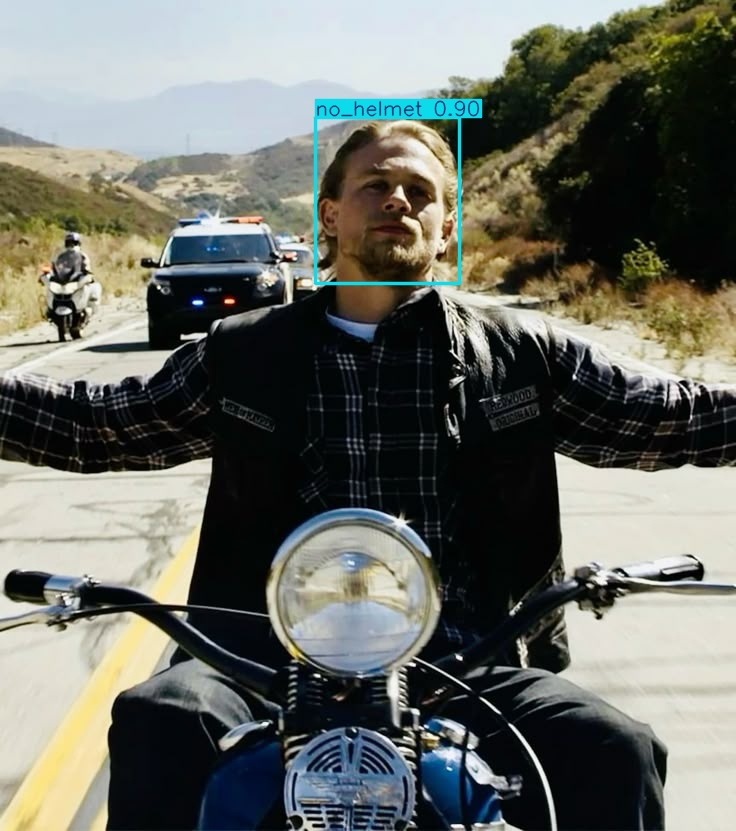

In [29]:
from IPython.display import Image, display
import os

# Get the first result from the list
result = results[0]  # ✅ this is a single prediction result

# Get the output directory where the image is saved
output_dir = result.save_dir

# List the files in that folder (should be 1 image)
predicted_files = os.listdir(output_dir)

# Build full path to the predicted image
predicted_image_path = os.path.join(output_dir, predicted_files[0])

# Show the image
display(Image(filename=predicted_image_path))
